In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Mrityunjoy Mandal\\OneDrive\\Desktop\\supermarket_sales.csv")

In [4]:
df.head(11)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


# 1. which city has more female shoppers?

In [6]:
df.groupby(['Gender','City']).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
Gender City                                                                     
Female Mandalay          162     162            162           162         162   
       Naypyitaw         178     178            178           178         178   
       Yangon            161     161            161           161         161   
Male   Mandalay          170     170            170           170         170   
       Naypyitaw         150     150            150           150         150   
       Yangon            179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
Gender City                                                            
Female Mandalay        162     162    162   162   162      162   162   
       Naypyitaw       178     178    178   178   178      178   178   
       Yangon          161     161    161   161   161      161   161   
Male   Mandalay        170     170    170   170   170      170   170   
       Naypyitaw       150     150    150   150   150      150   150   
       Yangon          179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
Gender City                                                      
Female Mandalay                       162           162     162  
       Naypyitaw                      178           178     178  
       Yangon                         161           161     161  
Male   Mandalay                       170           170     170  
       Naypyitaw                      150           150     150  
       Yangon                         179           179     179

In [15]:
female_shoppers = df.groupby(['Gender','City']).count()['Customer type']

In [16]:
female_shoppers

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Customer type, dtype: int64

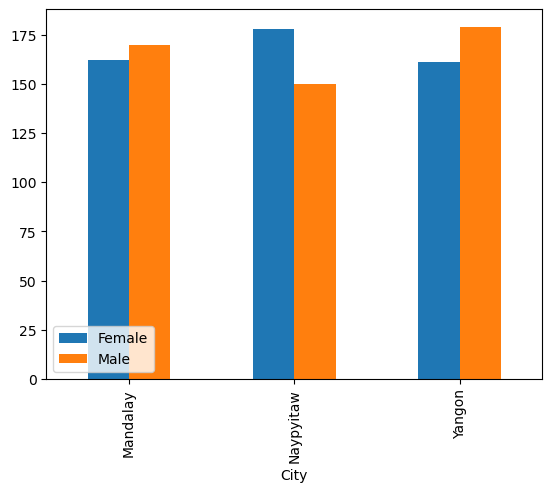

In [45]:
female_shoppers.unstack(level=0).plot(kind='bar')
plt.legend(loc='lower left')

# 2. Who spends more? Men or Female

In [25]:
df.groupby(['Gender']).sum()['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

<Axes: xlabel='Gender'>

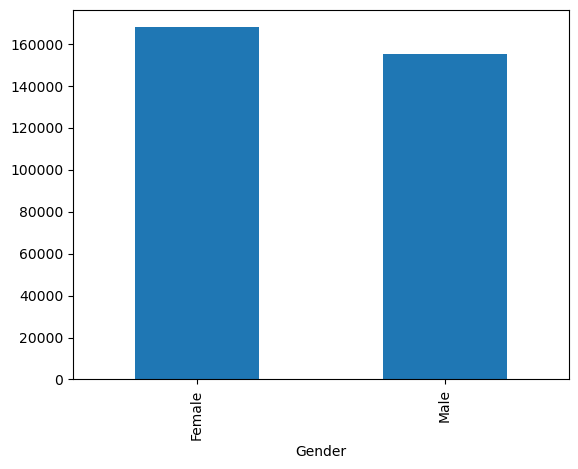

In [31]:
total = df.groupby(['Gender']).sum()['Total']
total.plot(kind='bar')

# 3. Which type of customer spends more? Member or Normal

In [34]:
df.groupby(['Customer type']).count()['Total']

Customer type
Member    501
Normal    499
Name: Total, dtype: int64

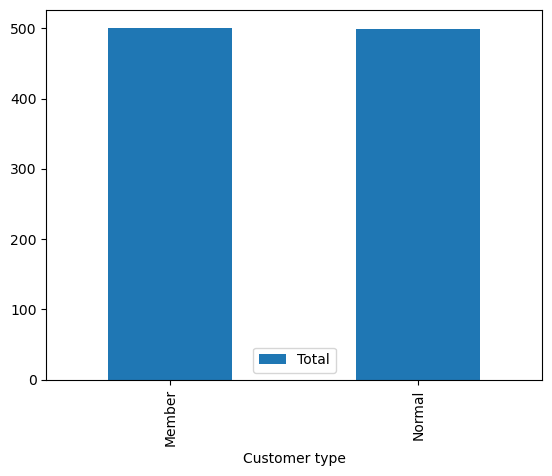

In [38]:
customer = df.groupby(['Customer type']).count()['Total']
customer.plot(kind='bar')
plt.legend()

# 4. Which product line has sells more?

In [53]:
df.groupby(['Product line']).count()['Total']

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Total, dtype: int64

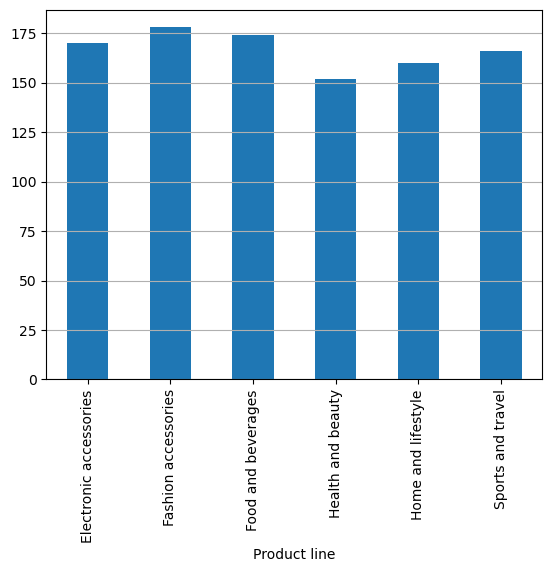

In [58]:
product = df.groupby(['Product line']).count()['Total']
product.plot(kind='bar')
plt.grid(axis='y')

# 5. Which Product line is popular among Men and Female?

In [61]:
df.groupby(['Gender', 'Product line']).count()['Total']

Gender  Product line          
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
Name: Total, dtype: int64

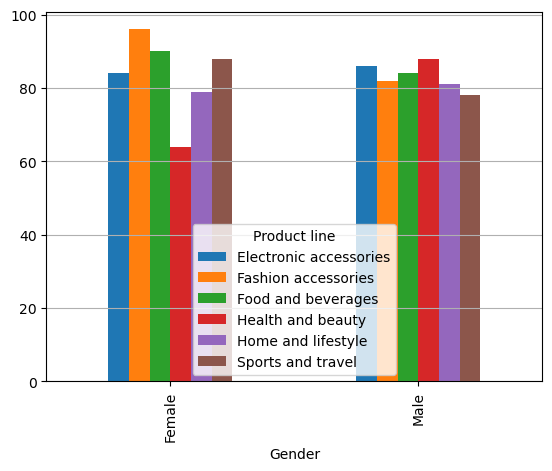

In [67]:
popular = df.groupby(['Gender', 'Product line']).count()['Total']
popular.unstack(level=1).plot(kind='bar')
plt.grid(axis='y')

# 6. Which days of the month has most sales?